In [19]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import BisectingKMeans
#from kneed import KneeLocator

## Segmentacion de clientes

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Convertir la variable cualitativa gender a binaria donde ‘Hombre’ vale 0 y ‘Mujer’ 1
df['Gender'] = pd.get_dummies(df['Gender']).values
df['Gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: uint8

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [6]:
#sns.pairplot(df.dropna(), hue='Gender',size=4,vars=["Age","Annual Income (k$)","Spending Score (1-100)"],kind='scatter')

In [7]:
x=np.array(df.iloc[:,3:])
print('x',np.shape(x))


x (200, 2)


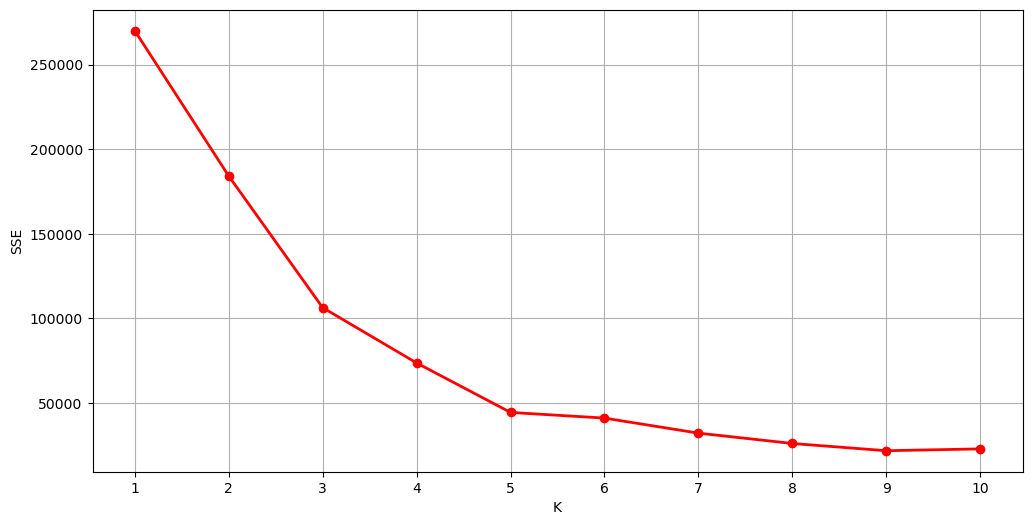

In [8]:

sse=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),sse, linewidth=2, color="red", marker ="o")
plt.xlabel("K")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSE")
plt.show()

In [36]:
# Consideramos K=5 aunque la curva es bastante suave
kmeans = KMeans(n_clusters=5, n_init="auto").fit(x)
# Getting the cluster centers
centroids = kmeans.cluster_centers_
print('centroids',centroids)

centroids [[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


labels [0 4 0 4 0 4 0 4 0 4]
['red', 'orange', 'red', 'orange', 'red', 'orange', 'red', 'orange', 'red', 'orange']


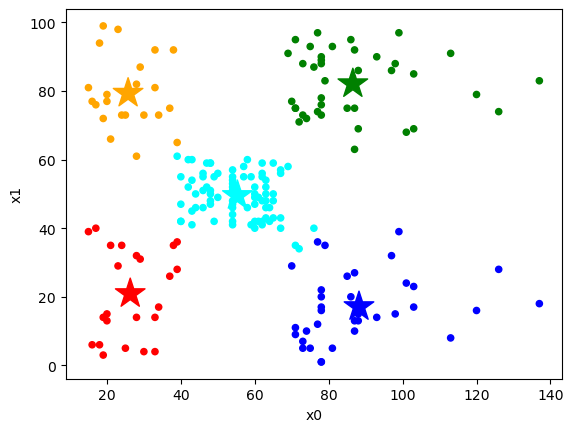

In [37]:
################
# Predicting the clusters
labels = kmeans.predict(x)
print('labels',labels[0:10])
# asignamos colores a cada cluster
colores=['red','green','blue','cyan','orange']
asignar=[]
for l in labels:
    asignar.append(colores[l])
print(asignar[0:10])

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(x[:, 1], x[:, 2], x[:, 3], c=asignar, s=20)
# ax.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 3], marker='*', c=colores, s=500)
# plt.title('x')
# plt.show()

fig = plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=asignar, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c=colores, s=500)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()





## Elegir K=6

In [11]:
# Consideramos K=6 aunque la curva es bastante suave
kmeans = KMeans(n_clusters=6, n_init="auto").fit(x)
# Getting the cluster centers
centroids = kmeans.cluster_centers_
print('centroids',centroids)

centroids [[89.40625    15.59375   ]
 [47.51162791 51.79069767]
 [25.72727273 20.22727273]
 [25.0952381  80.04761905]
 [86.53846154 82.12820513]
 [63.72093023 46.1627907 ]]


labels [2 3 2 3 2 3 2 3 2 3]
['blue', 'cyan', 'blue', 'cyan', 'blue', 'cyan', 'blue', 'cyan', 'blue', 'cyan']


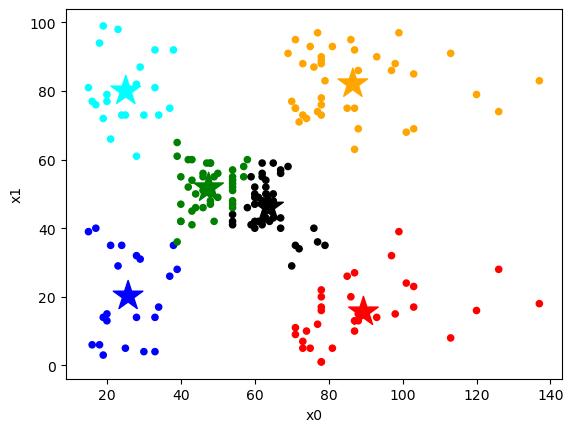

In [34]:
################
# Predicting the clusters

labels = kmeans.predict(x)
print('labels',labels[0:10])
# asignamos colores a cada cluster
colores=['red','green','blue','cyan','orange','black']
asignar=[]
for l in labels:
    asignar.append(colores[l])
print(asignar[0:10])

fig = plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=asignar, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c=colores, s=500)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()



## Hierarchical clustering

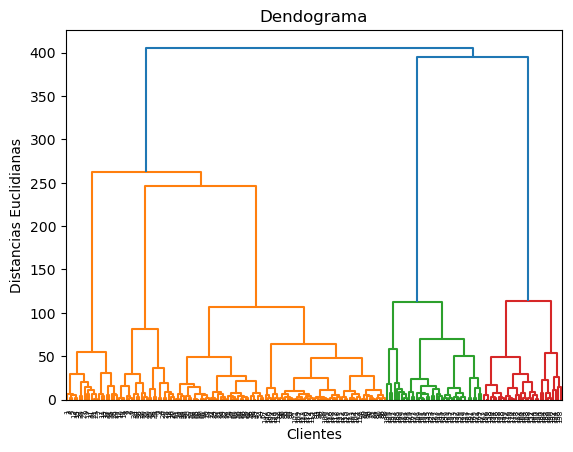

In [13]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [44]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
labels = hc.fit_predict(x)

['orange', 'cyan', 'orange', 'cyan', 'orange', 'cyan', 'orange', 'cyan', 'orange', 'cyan']


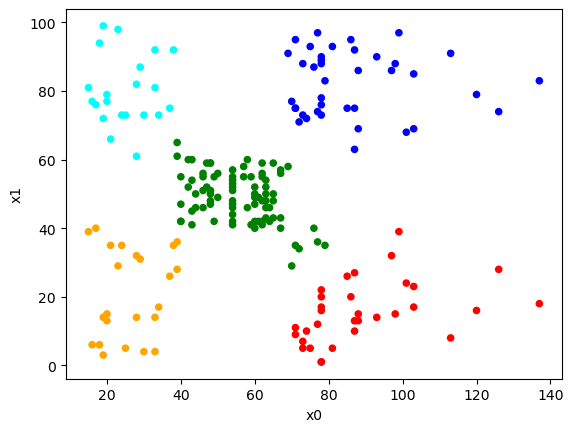

In [45]:
# graficos en 3 dimensiones para K=5
################
# asignamos colores a cada cluster
colores=['red','green','blue','cyan','orange', "black"]
asignar=[]
for l in labels:
    asignar.append(colores[l])
print(asignar[0:10])

fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(x[:, 0], x[:, 1], c=asignar, s=20)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()



## Divisive

In [30]:
bkmeans=BisectingKMeans(n_clusters=6,n_init=10)
bkmeans.fit(x)
bkmeans.inertia_


39003.260720258

labels [3 4 3 4 3 4 3 4 3 4]
['cyan', 'orange', 'cyan', 'orange', 'cyan', 'orange', 'cyan', 'orange', 'cyan', 'orange']


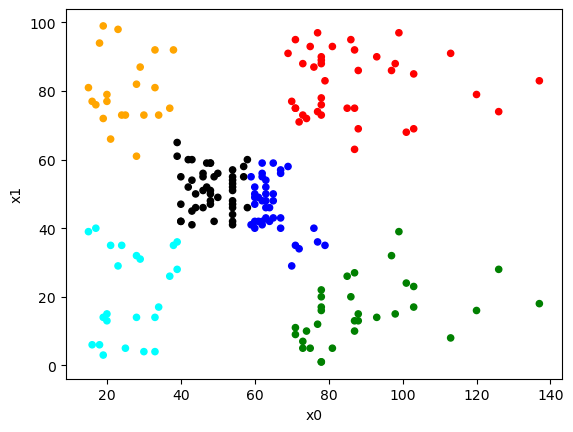

In [38]:
labels=bkmeans.predict(x)
print('labels',labels[0:10])
# asignamos colores a cada cluster
colores=['red','green','blue','cyan','orange','black']
asignar=[]
for l in labels:
    asignar.append(colores[l])
print(asignar[0:10])

fig = plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=asignar, s=20)
#plt.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c=colores, s=500)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

